In [1]:
#import libraries
import pandas as pd
#import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re
from datetime import datetime

pd.options.display.max_columns = 999
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline  

In [2]:
#read Star
Star_table = pd.read_csv('../data/processed/Propwall_Report_ForSale-26-3-18.csv')
Star_table["State"] = Star_table.State.apply(lambda x: x if x != 'Petaling Jaya' else 'Selangor')

#add column of quarter and year-quarter
Star_table['quarter'] = ((Star_table['month']-1)//3+1)

Star_table['year-quarter'] = Star_table['year'].astype(str) + '-' + Star_table['quarter'].astype(str)

# PriceIndex

# Comparison between Star, Edge and NAPIC - Yearly

In [3]:
#read Star
Star_table = pd.read_csv('../data/processed/Propwall_Report_ForSale-26-3-18.csv')
Star_table["State"] = Star_table.State.apply(lambda x: x if x != 'Petaling Jaya' else 'Selangor')

#add column of quarter and year-quarter
Star_table['quarter'] = ((Star_table['month']-1)//3+1)

Star_table['year-quarter'] = Star_table['year'].astype(str) + '-' + Star_table['quarter'].astype(str)

#categorize into state:KL, Selangor and Other

Star_table['State_cat'] = Star_table['State'].map(lambda x:'Other' if x not in ['Selangor','Kuala Lumpur'] else x)

##Computation of Sales Price Index
df2 = Star_table.copy()

#Total of posting based on state and year
df_grouped = df2[['Location_property','State_cat','year']].groupby(['State_cat','year'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped.columns=[j if j else i for i,j in df_grouped.columns.values]

#total of posting based on year
df_grouped2 = df2[['Location_property','year']].groupby(['year'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped2.columns=[j if j else i for i,j in df_grouped2.columns.values]

#average of sales price based on state and year
df_grouped3_average = df2[['year','State_cat','price']].groupby(['State_cat','year'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year
df_grouped3_median = df2[['year','State_cat','price']].groupby(['State_cat','year'])\
.agg({'price':'median'}).reset_index()

#average of sales price based on state and year
df_grouped4_average = df2[['year','State_cat','price']].groupby(['State_cat','year'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year
df_grouped4_median = df2[['year','State_cat','price']].groupby(['State_cat','year'])\
.agg({'price':'median'}).reset_index()

#get base values
base_array_average = [i for i in df_grouped4_average.values if i[1] == 2013]
base_array_median = [i for i in df_grouped4_median.values if i[1] == 2013]

#weightage calculated from ratio of frequency by year and state
weightage_dict = {(i[0],i[1]):i[2]/{i[0]:i[1] for i in df_grouped2.values}[i[1]] for i in df_grouped.values}

BaseYear_dict = {i[0]:i[2] for i in df_grouped4_average.values if i[1] == 2013}
HPI_tuple_Kl = [(i[0],i[1],(i[2]/BaseYear_dict['Kuala Lumpur'])*
                 {i:j for i,j in weightage_dict.items() if i[0] == 'Kuala Lumpur'}[('Kuala Lumpur',i[1])]*100) 
                for i in df_grouped3_average.values if i[0] == 'Kuala Lumpur']
HPI_tuple_Sel = [(i[0],i[1],(i[2]/BaseYear_dict['Selangor'])*
                 {i:j for i,j in weightage_dict.items() if i[0] == 'Selangor'}[('Selangor',i[1])]*100) 
                for i in df_grouped3_average.values if i[0] == 'Selangor']
HPI_tuple_Other = [(i[0],i[1],(i[2]/BaseYear_dict['Other'])*
                 {i:j for i,j in weightage_dict.items() if i[0] == 'Other'}[('Other',i[1])]*100) 
                for i in df_grouped3_average.values if i[0] == 'Other']

#sum of weighted HPI
HPI_sales_list = [i[0][2]+i[1][2]+i[2][2] for i in [i for i in zip(HPI_tuple_Kl,HPI_tuple_Sel,HPI_tuple_Other)]]

#for excel
#Star_sales_result = pd.DataFrame({'Year':pd.Series([int(i) for i in range(2013,2018)]),'HPI':pd.Series(HPI_sales_list)})\
#                     .rename(columns = {'HPI':'HPI-Star'})
#for seaborn
Star_sales_result = pd.DataFrame({'Year':pd.Series([int(i) for i in range(2013,2018)]),'HPI':pd.Series(HPI_sales_list)})
Star_sales_result['Source'] = 'Star'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [13]:
Star_sales_result

HPI  Year
0 100.000  2013
1  98.931  2014
2  92.981  2015
3  88.937  2016
4  94.099  2017

In [4]:
#Estate source
Estate123_table = pd.read_csv("../data/processed/hs_clean_sale.csv")

#extract year
Estate123_table['year'] = Estate123_table['Date_Posted'].map(lambda x:re.search('(\d{4})',x).group(1))

#categorize into state:KL, Selangor and Other
Estate123_table['State_cat'] = Estate123_table['State'].map(lambda x:'Other' if x not in ['Selangor','Kuala Lumpur'] else x)

df2 = Estate123_table.copy()

#Total of posting based on state and year
df_grouped = df2[['Post_Title','State_cat','year']].groupby(['State_cat','year'])\
.agg({'Post_Title':{'Total of listings':'count'}}).reset_index()
df_grouped.columns=[j if j else i for i,j in df_grouped.columns.values]

#total of posting based on year
df_grouped2 = df2[['Post_Title','year']].groupby(['year'])\
.agg({'Post_Title':{'Total of listings':'count'}}).reset_index()
df_grouped2.columns=[j if j else i for i,j in df_grouped2.columns.values]

#average of sales price based on state and year
df_grouped3_average = df2[['year','State_cat','Price_num']].groupby(['State_cat','year'])\
.agg({'Price_num':'mean'}).reset_index()

#median of sales price based on state and year
df_grouped3_median = df2[['year','State_cat','Price_num']].groupby(['State_cat','year'])\
.agg({'Price_num':'median'}).reset_index()

#average of sales price based on state and year
df_grouped4_average = df2[['year','State_cat','Price_num']].groupby(['State_cat','year'])\
.agg({'Price_num':'mean'}).reset_index()

#median of sales price based on state and year
df_grouped4_median = df2[['year','State_cat','Price_num']].groupby(['State_cat','year'])\
.agg({'Price_num':'median'}).reset_index()

#get base values
base_array_average = [i for i in df_grouped4_average.values if i[1] == 2013]
base_array_median = [i for i in df_grouped4_median.values if i[1] == 2013]

#weightage calculated from ratio of frequency by year and state
weightage_dict = {(i[0],i[1]):i[2]/{i[0]:i[1] for i in df_grouped2.values}[i[1]] for i in df_grouped.values}

BaseYear_dict = {i[0]:i[2] for i in df_grouped4_average.values if i[1] == '2013'}
HPI_tuple_Kl = [(i[0],i[1],(i[2]/BaseYear_dict['Kuala Lumpur'])*
                 {i:j for i,j in weightage_dict.items() if i[0] == 'Kuala Lumpur'}[('Kuala Lumpur',i[1])]*100) 
                for i in df_grouped3_average.values if i[0] == 'Kuala Lumpur']
HPI_tuple_Sel = [(i[0],i[1],(i[2]/BaseYear_dict['Selangor'])*
                 {i:j for i,j in weightage_dict.items() if i[0] == 'Selangor'}[('Selangor',i[1])]*100) 
                for i in df_grouped3_average.values if i[0] == 'Selangor']
HPI_tuple_Other = [(i[0],i[1],(i[2]/BaseYear_dict['Other'])*
                 {i:j for i,j in weightage_dict.items() if i[0] == 'Other'}[('Other',i[1])]*100) 
                for i in df_grouped3_average.values if i[0] == 'Other']

#sum of weighted HPI
HPI_sales_list = [i[0][2]+i[1][2]+i[2][2] for i in [i for i in zip(HPI_tuple_Kl,HPI_tuple_Sel,HPI_tuple_Other)]]
#for excel
#Estate_sales_result = pd.DataFrame({'Year':pd.Series([i for i in range(2009,2018)]),'HPI':pd.Series(HPI_sales_list)})\
#                        .rename(columns = {'HPI':'HPI-Estate'})
#for seaborn
Estate_sales_result = pd.DataFrame({'Year':pd.Series([i for i in range(2009,2018)]),'HPI':pd.Series(HPI_sales_list)})
Estate_sales_result['Source'] = 'Estate'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [5]:
#for excel
#NAPIC_sales_result = pd.DataFrame({'Year':pd.Series([i for i in range(2013,2017)])
#                                   ,'HPI':pd.Series([140,153.2,164.5,176.1])})\
#                    .rename(columns = {'HPI':'HPI-NAPIC'})
#for seaborn
NAPIC_sales_result = pd.DataFrame({'Year':pd.Series([i for i in range(2013,2017)])
                                   ,'HPI':pd.Series(np.multiply(np.divide([301964,330428,354741,379843],301964),100))})
NAPIC_sales_result['Source'] = 'NAPIC'

In [6]:
#for excel
merged_table = Estate_sales_result[Estate_sales_result['Year'].map(lambda x:x in list(NAPIC_sales_result['Year']))]\
                .merge(NAPIC_sales_result,on = 'Year',how = 'left')\
                .merge(Star_sales_result[Star_sales_result['Year']
                                          .map(lambda x:x in list(NAPIC_sales_result['Year']))],
                        on = 'Year',how = 'left')
merged_table

HPI_x  Year Source_x   HPI_y Source_y     HPI Source
0 100.000  2013   Estate 100.000    NAPIC 100.000   Star
1 131.690  2014   Estate 109.426    NAPIC  98.931   Star
2 112.414  2015   Estate 117.478    NAPIC  92.981   Star
3  86.002  2016   Estate 125.791    NAPIC  88.937   Star

In [38]:
#for seaborn
merged_table = pd.concat([NAPIC_sales_result,Star_sales_result[Star_sales_result['Year']
                                          .map(lambda x:x in list(NAPIC_sales_result['Year']))]
                          ,Estate_sales_result[Estate_sales_result['Year']
                                               .map(lambda x:x in list(NAPIC_sales_result['Year']))]])
merged_table

HPI  Year  Source
0 100.000  2013   NAPIC
1 109.426  2014   NAPIC
2 117.478  2015   NAPIC
3 125.791  2016   NAPIC
0 100.000  2013    Star
1  98.931  2014    Star
2  92.981  2015    Star
3  88.937  2016    Star
4 100.000  2013  Estate
5 131.690  2014  Estate
6 112.414  2015  Estate
7  86.002  2016  Estate

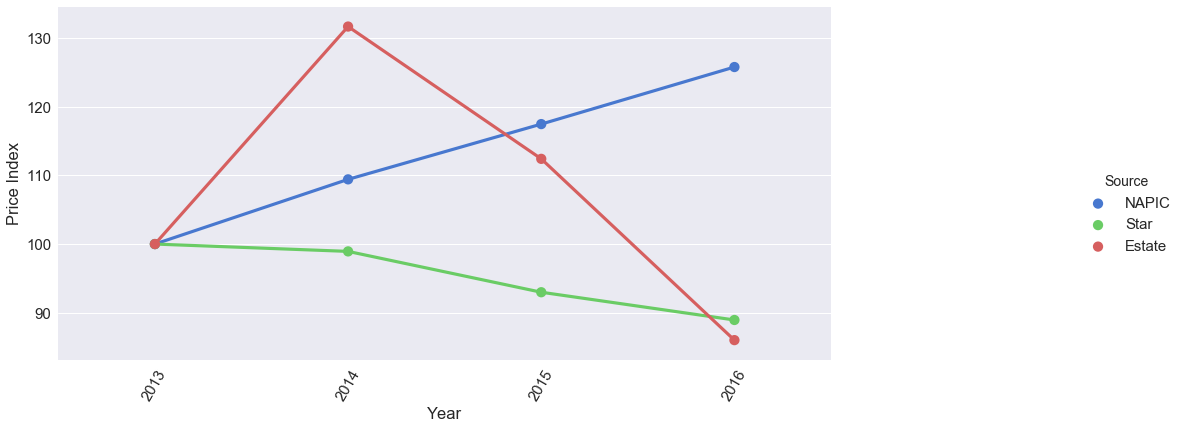

In [39]:
sns.set(font_scale=1.5)
g = sns.factorplot(x="Year", y="HPI",hue="Source", data=merged_table, 
               capsize=.2, palette="muted", size=6, aspect=.75)
g.fig.set_size_inches(20,6)
g.set_ylabels('Price Index')
g.set_xticklabels(rotation = 60)
#g.set_titles('Comparison of Sales HPI')
g.despine(left=True)
#g.savefig('../graphs/Comparison_rentalEdge_{}_condoavg.png'.format(i),bbox_inches = 'tight')

In [42]:
merged_table.to_excel('../data/processed/ComparisonPriceIndex_3Sources.xlsx')

# Comparison between Star, PropertyGuru, Edge and NAPIC - Quarterly

In [8]:
#read Star
Star_table = pd.read_csv('../data/processed/Propwall_Report_ForSale-26-3-18.csv')
Star_table["State"] = Star_table.State.apply(lambda x: x if x != 'Petaling Jaya' else 'Selangor')

#add column of quarter and year-quarter
Star_table['quarter'] = ((Star_table['month']-1)//3+1)

Star_table['year-quarter'] = Star_table['year'].astype(str) + '-' + Star_table['quarter'].astype(str)

#categorize into state:KL, Selangor and Other

Star_table['State_cat'] = Star_table['State'].map(lambda x:'Other' if x not in ['Selangor','Kuala Lumpur'] else x)

##Computation of Sales Price Index
df2 = Star_table.copy()

#Total of posting based on state and year-quarter
df_grouped = df2[['Location_property','State_cat','year-quarter']].groupby(['State_cat','year-quarter'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped.columns=[j if j else i for i,j in df_grouped.columns.values]

#total of posting based on year-quarter
df_grouped2 = df2[['Location_property','year-quarter']].groupby(['year-quarter'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped2.columns=[j if j else i for i,j in df_grouped2.columns.values]

#average of sales price based on state and year-quarter
df_grouped3_average = df2[['year-quarter','State_cat','price']].groupby(['State_cat','year-quarter'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year-quarter
df_grouped3_median = df2[['year-quarter','State_cat','price']].groupby(['State_cat','year-quarter'])\
.agg({'price':'median'}).reset_index()

#average of sales price based on state and year-quarter
df_grouped4_average = df2[['year-quarter','State_cat','price']].groupby(['State_cat','year-quarter'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year
df_grouped4_median = df2[['year-quarter','State_cat','price']].groupby(['State_cat','year-quarter'])\
.agg({'price':'median'}).reset_index()

#get base values
base_array_average = [i for i in df_grouped4_average.values if i[1] == '2015-1']
base_array_median = [i for i in df_grouped4_median.values if i[1] == '2015-1']

#weightage calculated from ratio of frequency by year and state
weightage_dict = {(i[0],i[1]):i[2]/{i[0]:i[1] for i in df_grouped2.values}[i[1]] for i in df_grouped.values}

BaseYear_dict = {i[0]:i[2] for i in df_grouped4_average.values if i[1] == '2015-1'}
HPI_tuple_Kl = [(i[0],i[1],(i[2]/BaseYear_dict['Kuala Lumpur'])*
                 {i:j for i,j in weightage_dict.items() if i[0] == 'Kuala Lumpur'}[('Kuala Lumpur',i[1])]*100) 
                for i in df_grouped3_average.values if i[0] == 'Kuala Lumpur']
HPI_tuple_Sel = [(i[0],i[1],(i[2]/BaseYear_dict['Selangor'])*
                 {i:j for i,j in weightage_dict.items() if i[0] == 'Selangor'}[('Selangor',i[1])]*100) 
                for i in df_grouped3_average.values if i[0] == 'Selangor']
HPI_tuple_Other = [(i[0],i[1],(i[2]/BaseYear_dict['Other'])*
                 {i:j for i,j in weightage_dict.items() if i[0] == 'Other'}[('Other',i[1])]*100) 
                for i in df_grouped3_average.values if i[0] == 'Other']

#sum of weighted HPI
HPI_sales_list = [i[0][2]+i[1][2]+i[2][2] for i in [i for i in zip(HPI_tuple_Kl,HPI_tuple_Sel,HPI_tuple_Other)]]

#for excel
#Star_sales_result = pd.DataFrame({'Year':pd.Series([int(i) for i in range(2013,2018)]),'HPI':pd.Series(HPI_sales_list)})\
#                     .rename(columns = {'HPI':'HPI-Star'})
#for seaborn
Star_sales_result = pd.DataFrame({'Year-Quarter':pd.Series(df_grouped2['year-quarter'].values),
                                  'HPI':pd.Series(HPI_sales_list)})
Star_sales_result['Source'] = 'Star'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [59]:
#PropertyGuru
PropertyGuru_table = pd.read_excel('../data/external/PropertyGuruMarketIndex-QoQ.xlsx')
PropertyGuru_table['Year-Quarter'] = PropertyGuru_table['period'].map(lambda x:re.sub('Q','',x))
PropertyGuru_table['Source'] = 'PropertyGuru'

In [50]:
#Estate source
Estate123_table = pd.read_csv("../data/processed/hs_clean_sale.csv")

#extract year
Estate123_table['year'] = Estate123_table['Date_Posted'].map(lambda x:re.search('(\d{4})',x).group(1))

#Estate source
Estate123_table = pd.read_csv("../data/processed/hs_clean_sale.csv")

#extract year
Estate123_table['year'] = Estate123_table['Date_Posted'].map(lambda x:re.search('(\d{4})',x).group(1))

Estate123_table['month'] = pd.to_datetime(Estate123_table['Date_Posted']).dt.month

#add column of quarter and year-quarter
Estate123_table['quarter'] = ((Estate123_table['month']-1)//3+1)

Estate123_table['year-quarter'] = Estate123_table['year'].astype(str) + '-' + Estate123_table['quarter'].astype(str)

#categorize into state:KL, Selangor and Other
Estate123_table['State_cat'] = Estate123_table['State'].map(lambda x:'Other' if x not in ['Selangor','Kuala Lumpur'] else x)

df2 = Estate123_table.copy()

#Total of posting based on state and year-quarter
df_grouped = df2[['Post_Title','State_cat','year-quarter']].groupby(['State_cat','year-quarter'])\
.agg({'Post_Title':{'Total of listings':'count'}}).reset_index()
df_grouped.columns=[j if j else i for i,j in df_grouped.columns.values]

#total of posting based on year-quarter
df_grouped2 = df2[['Post_Title','year-quarter']].groupby(['year-quarter'])\
.agg({'Post_Title':{'Total of listings':'count'}}).reset_index()
df_grouped2.columns=[j if j else i for i,j in df_grouped2.columns.values]

#average of sales price based on state and year-quarter
df_grouped3_average = df2[['year-quarter','State_cat','Price_num']].groupby(['State_cat','year-quarter'])\
.agg({'Price_num':'mean'}).reset_index()

#median of sales price based on state and year-quarter
df_grouped3_median = df2[['year-quarter','State_cat','Price_num']].groupby(['State_cat','year-quarter'])\
.agg({'Price_num':'median'}).reset_index()

#average of sales price based on state and year-quarter
df_grouped4_average = df2[['year-quarter','State_cat','Price_num']].groupby(['State_cat','year-quarter'])\
.agg({'Price_num':'mean'}).reset_index()

#median of sales price based on state and year-quarter
df_grouped4_median = df2[['year-quarter','State_cat','Price_num']].groupby(['State_cat','year-quarter'])\
.agg({'Price_num':'median'}).reset_index()

#get base values
base_array_average = [i for i in df_grouped4_average.values if i[1] == '2015-1']
base_array_median = [i for i in df_grouped4_median.values if i[1] == '2015-1']

#weightage calculated from ratio of frequency by year and state
weightage_dict = {(i[0],i[1]):i[2]/{i[0]:i[1] for i in df_grouped2.values}[i[1]] for i in df_grouped.values}

BaseYear_dict = {i[0]:i[2] for i in df_grouped4_average.values if i[1] == '2015-1'}
HPI_tuple_Kl = [(i[0],i[1],(i[2]/BaseYear_dict['Kuala Lumpur'])*
                 {i:j for i,j in weightage_dict.items() if i[0] == 'Kuala Lumpur'}[('Kuala Lumpur',i[1])]*100) 
                for i in df_grouped3_average.values if i[0] == 'Kuala Lumpur']
HPI_tuple_Sel = [(i[0],i[1],(i[2]/BaseYear_dict['Selangor'])*
                 {i:j for i,j in weightage_dict.items() if i[0] == 'Selangor'}[('Selangor',i[1])]*100) 
                for i in df_grouped3_average.values if i[0] == 'Selangor']
HPI_tuple_Other = [(i[0],i[1],(i[2]/BaseYear_dict['Other'])*
                 {i:j for i,j in weightage_dict.items() if i[0] == 'Other'}[('Other',i[1])]*100) 
                for i in df_grouped3_average.values if i[0] == 'Other']

#sum of weighted HPI
HPI_sales_list = [i[0][2]+i[1][2]+i[2][2] for i in [i for i in zip(HPI_tuple_Kl,HPI_tuple_Sel,HPI_tuple_Other)]]
#for excel
#Estate_sales_result = pd.DataFrame({'Year':pd.Series([i for i in range(2009,2018)]),'HPI':pd.Series(HPI_sales_list)})\
#                        .rename(columns = {'HPI':'HPI-Estate'})
#for seaborn
Estate_sales_result = pd.DataFrame({'Year-Quarter':pd.Series(df_grouped2['year-quarter'].values),
                                    'HPI':pd.Series(HPI_sales_list)})
Estate_sales_result['Source'] = 'Estate'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [45]:
#NAPIC
#for seaborn
NAPIC_sales_result = pd.DataFrame({'Year-Quarter':pd.Series(['2015-1','2015-2','2015-3','2015-4',
                                                            '2016-1','2016-2','2016-3','2016-4'])
                                   ,'HPI':pd.Series(np.multiply(np.divide([662185,666808,691676,696194,
                                                                          704478,727855,747391,749305],662185),100))})
NAPIC_sales_result['Source'] = 'NAPIC'

In [63]:
#for seaborn
merged_table = pd.concat([NAPIC_sales_result
                          ,Star_sales_result[Star_sales_result['Year-Quarter']
                                          .map(lambda x:x in NAPIC_sales_result['Year-Quarter'].values)]
                         ,Estate_sales_result[Estate_sales_result['Year-Quarter']
                                               .map(lambda x:x in NAPIC_sales_result['Year-Quarter'].values)]
                         ,PropertyGuru_table[['MarketIndex','Year-Quarter','Source']]\
                          [PropertyGuru_table['Year-Quarter'].map(lambda x:x in NAPIC_sales_result['Year-Quarter'].values)]
                          .rename(columns = {'MarketIndex':'HPI'})])
merged_table

HPI Year-Quarter        Source
0  100.000       2015-1         NAPIC
1  100.698       2015-2         NAPIC
2  104.454       2015-3         NAPIC
3  105.136       2015-4         NAPIC
4  106.387       2016-1         NAPIC
5  109.917       2016-2         NAPIC
6  112.867       2016-3         NAPIC
7  113.156       2016-4         NAPIC
8  100.000       2015-1          Star
9  101.300       2015-2          Star
10  97.359       2015-3          Star
11  94.714       2015-4          Star
12  95.250       2016-1          Star
13  93.876       2016-2          Star
14  92.091       2016-3          Star
15  93.866       2016-4          Star
24 100.000       2015-1        Estate
25  84.883       2015-2        Estate
26 110.759       2015-3        Estate
27  78.372       2015-4        Estate
28  86.923       2016-1        Estate
29  85.893       2016-2        Estate
30  65.928       2016-3        Estate
31  68.560       2016-4        Estate
0  100.000       2015-1  PropertyGuru
1  100.400       2015-2  PropertyGuru
2  100.700       2015-3  PropertyGuru
3   95.200       2015-4  PropertyGuru
4   92.000       2016-1  PropertyGuru
5   91.700       2016-2  PropertyGuru
6   90.300       2016-3  PropertyGuru
7   89.900       2016-4  PropertyGuru

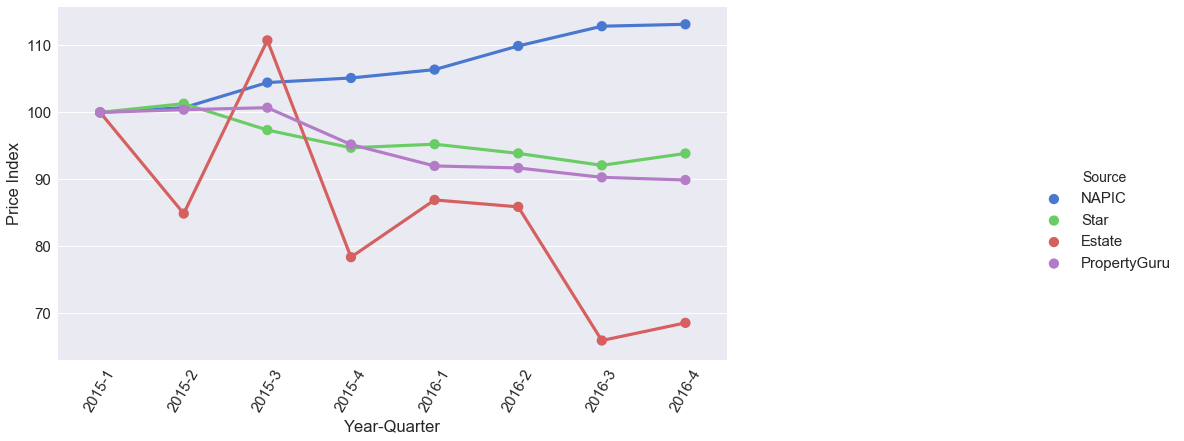

In [64]:
sns.set(font_scale=1.5)
g = sns.factorplot(x="Year-Quarter", y="HPI",hue="Source", data=merged_table, 
               capsize=.2, palette="muted", size=6, aspect=.75)
g.fig.set_size_inches(20,6)
g.set_ylabels('Price Index')
g.set_xticklabels(rotation = 60)
#g.set_titles('Comparison of Sales HPI')
g.despine(left=True)
#g.savefig('../graphs/Comparison_rentalEdge_{}_condoavg.png'.format(i),bbox_inches = 'tight')

In [66]:
merged_table.to_excel('../data/excel/ComparisonPriceIndex_4Sources.xlsx')

# Price index based on house type and location

In [43]:
df2 = Star_table[Star_table['Type'] == 'House'].copy()

#Total of posting based on state and year-quarter
df_grouped = df2[['Location_property','State','year-quarter']].groupby(['State','year-quarter'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped.columns=[j if j else i for i,j in df_grouped.columns.values]

#total of posting based on year-quarter
df_grouped2 = df2[['Location_property','year-quarter']].groupby(['year-quarter'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped2.columns=[j if j else i for i,j in df_grouped2.columns.values]

#average of sales price based on state and quarter
df_grouped3_average = df2[['year-quarter','State','price']].groupby(['State','year-quarter'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year-quarter
df_grouped3_median = df2[['year-quarter','State','price']].groupby(['State','year-quarter'])\
.agg({'price':'median'}).reset_index()

#average of sales price based on state and year
df_grouped4_average = df2[['year','State','price']].groupby(['State','year'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year
df_grouped4_median = df2[['year','State','price']].groupby(['State','year'])\
.agg({'price':'median'}).reset_index()

#get base values
base_array_average = [i for i in df_grouped4_average.values if i[1] == 2013]
base_array_median = [i for i in df_grouped4_median.values if i[1] == 2013]

state_list = ['Kuala Lumpur','Perak','Selangor','Pahang',
             'Kedah','Penang','Johor','Sarawak',
             'Melaka','Sabah','Negeri Sembilan']
#smart way
for i in state_list:
    #print('HPI_{}_house_avg'.format(re.sub(' ','',i)))
    exec('HPI_{}_house_avg = [(i[0],i[1],(i[2]/[i[2] for i in base_array_average'.format(re.sub(' ','',i)) +
    ' if i[0] == "{}"][0])*100)'.format(i) + ' for i in df_grouped3_average.values if i[0] == "{}"]'.format(i))

panda_dict = {}
for i in state_list:
    exec('panda_dict["{}"] = pd.Series([i[2] for i in HPI_{}_house_avg])'.format(i,re.sub(' ','',i)))

#form pandas df for star
Starhouse_df = pd.DataFrame(panda_dict)
Starhouse_df['Source'] = 'Star'
Starhouse_df.index = df_grouped3_average['year-quarter'].unique()

#price index for other states - house
df2 = Star_table[(Star_table['Type'] == 'House') 
                 & (Star_table['State'].map(lambda x:x not in ['Kuala Lumpur','Selangor']))].copy()
base_price = np.mean(df2[df2['year'] == 2013]['price'])
df_grouped = df2[['year-quarter','price']].groupby('year-quarter')\
.agg({'price':'mean'}).reset_index()
df_grouped['price_index'] = (df_grouped['price']/base_price)*100

Starhouse_df['Others'] = df_grouped['price_index'].values

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [60]:
Starhouse_df[['Kuala Lumpur','Selangor','Others']]\
.to_excel('../data/processed/SalesPriceIndex_House.xlsx')

In [57]:
df2 = Star_table[Star_table['Type'] == 'Condominium'].copy()

#Total of posting based on state and year-quarter
df_grouped = df2[['Location_property','State','year-quarter']].groupby(['State','year-quarter'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped.columns=[j if j else i for i,j in df_grouped.columns.values]

#total of posting based on year-quarter
df_grouped2 = df2[['Location_property','year-quarter']].groupby(['year-quarter'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped2.columns=[j if j else i for i,j in df_grouped2.columns.values]

#average of sales price based on state and quarter
df_grouped3_average = df2[['year-quarter','State','price']].groupby(['State','year-quarter'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year-quarter
df_grouped3_median = df2[['year-quarter','State','price']].groupby(['State','year-quarter'])\
.agg({'price':'median'}).reset_index()

#average of sales price based on state and year
df_grouped4_average = df2[['year','State','price']].groupby(['State','year'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year
df_grouped4_median = df2[['year','State','price']].groupby(['State','year'])\
.agg({'price':'median'}).reset_index()

#get base values
base_array_average = [i for i in df_grouped4_average.values if i[1] == 2013]
base_array_median = [i for i in df_grouped4_median.values if i[1] == 2013]

state_list = ['Kuala Lumpur','Perak','Selangor','Pahang',
             'Kedah','Penang','Johor','Sarawak',
             'Melaka','Sabah','Negeri Sembilan']
#smart way
for i in state_list:
    #print('HPI_{}_house_avg'.format(re.sub(' ','',i)))
    exec('HPI_{}_condo_avg = [(i[0],i[1],(i[2]/[i[2] for i in base_array_average'.format(re.sub(' ','',i)) +
    ' if i[0] == "{}"][0])*100)'.format(i) + ' for i in df_grouped3_average.values if i[0] == "{}"]'.format(i))

panda_dict = {}
for i in state_list:
    exec('panda_dict["{}"] = pd.Series([i[2] for i in HPI_{}_condo_avg])'.format(i,re.sub(' ','',i)))

#form pandas df for star
Starcondo_df = pd.DataFrame(panda_dict)
Starcondo_df['Source'] = 'Star'
Starcondo_df.index = df_grouped3_average['year-quarter'].unique()

#price index for other states - house
df2 = Star_table[(Star_table['Type'] == 'Condominium') 
                 & (Star_table['State'].map(lambda x:x not in ['Kuala Lumpur','Selangor']))].copy()
base_price = np.mean(df2[df2['year'] == 2013]['price'])
df_grouped = df2[['year-quarter','price']].groupby('year-quarter')\
.agg({'price':'mean'}).reset_index()
df_grouped['price_index'] = (df_grouped['price']/base_price)*100

Starcondo_df['Others'] = df_grouped['price_index'].values

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [59]:
Starcondo_df[['Kuala Lumpur','Selangor','Others']]\
.to_excel('../data/processed/SalesPriceIndex_Condo.xlsx')